In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

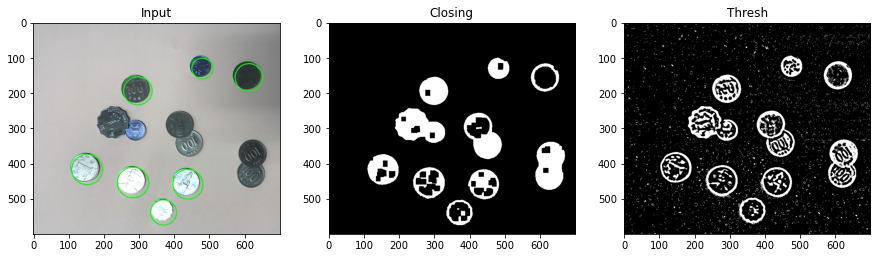

In [3]:
img = cv2.imread('sIMG_8255.JPG',1)
img = img[60:660, 50:750]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV, 11, 1)
kernel = np.ones((4, 4), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel,iterations = 1)
dilation = cv2.dilate(opening,kernel,iterations = 1)
erosion = cv2.erode(dilation,kernel,iterations = 1)
closing = cv2.morphologyEx(erosion, cv2.MORPH_CLOSE,kernel, iterations=4)
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area >9000 :
        continue
    if len(cnt) < 8:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img, ellipse, (0,255,0), 2)
plt.figure(figsize=(15,15))
plt.subplot(331),plt.imshow(img,"gray"),plt.title('Input')
plt.subplot(332),plt.imshow(closing,"gray"),plt.title('Closing')
plt.subplot(333),plt.imshow(thresh,"gray"),plt.title('Thresh')
plt.show()